In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
pip install gym

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register


# register(
#     id = 'FrozenLake-v3',
#     entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name':'4x4','is_slippery':False})


env = gym.make('FrozenLake-v3')

#Q테이블 0으로 초기화 : 2차원
Q = np.zeros([env.observation_space.n, env.action_space.n])
#discount 정의
dis = 0.99
#에피소드
num_episodes = 2000
#에피소드마다 총 리워드의 합을 저장 리스트
rList = []

#######################random noise 방식################################
for i in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False

  #Q learning 알고
  while not done:
    # Action 중에 가장 R(Reward)이 큰 Action을 고른다. 
    # 이 때, random noise 방식으로 decaying Exploit & Exploration 구현 
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
    # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
    new_state, reward, done, _ = env.step(action)        
    # Q = R + Q 
    Q[state, action] = reward + dis * np.max(Q[new_state, :])
    
    rAll += reward
    state = new_state
    
  rList.append(rAll)

########################E-greedy방식#####################################
for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False
    
    # exploration의 확률 (decaying)
    e = 1./((i / 100) + 1)
    
    # Q learning 알고리즘
    while not done : 
        
        # E-Greedy 알고리즘으로 action 고르기
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else : 
            action = np.argmax(Q[state, :])
        
        # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
        new_state, reward, done, _ = env.step(action)
        
        # Q = R + Q 
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)




non-deterministic ver.

success rate: 0.19
Final Q-table values
[[6.32892790e-04 1.17742109e-03 1.99961319e-03 6.27656425e-03]
 [1.82446299e-07 1.11312216e-05 1.16475918e-05 7.14949154e-03]
 [1.24782002e-04 2.85843403e-04 1.25320590e-04 7.29503782e-03]
 [1.02915401e-07 1.07092010e-05 1.32636555e-05 7.29430095e-03]
 [1.98846112e-03 5.63202853e-04 1.83812308e-05 1.82910986e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.11455806e-07 9.59645743e-05 3.16360528e-02 7.66485191e-27]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.14476840e-06 8.35717617e-05 1.62045929e-05 8.59466230e-03]
 [8.27611924e-05 4.51013167e-04 2.73939221e-04 1.38980738e-06]
 [1.90124192e-04 9.51566348e-09 3.43194122e-02 1.76129707e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.67311887e-01 7.24473851e-04]
 [1.89275550e-04 9.99993254e-01 1.01085849e-02 0.00000000e+00]
 [0.00000000e+0

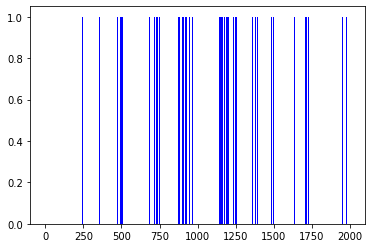

In [16]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n, env.action_space.n])
learning_rate = 0.99
dis = .99
num_episodes = 2000
rList = []

#Q_learning 알고
for i in range(num_episodes):

    #env 리셋
    state = env.reset()
    rAll=0
    done = False
    #decaying E-greedy
    e = 1./((i//100)+1)
    #Q-table learing algo
    while not done:
        # Choose an action by e greedy
        '''
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        '''

        #add random noise
        action = np.argmax(Q[state, :]+ np.random.randn(1, env.action_space.n)/(i + 1))
        #new_state, reward 업데이트
        new_state, reward, done, _ = env.step(action)
        #update Q-table
        Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate*(reward + dis*np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)


print('success rate:', str(sum(rList)/num_episodes))
print('Final Q-table values')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()
